In [2]:
import math,numpy as np, matplotlib.pyplot as plt

np.set_printoptions(precision = 2)
x = np.array([52,33,30,29,55,44,41,43,68,55,55,67,55,
              57,52,34,29,30,28,28,41,50,49,44,52,79,68,83,107,105])
print "Среднее временного ряда: ", '{0:.3f}'.format(np.mean(x))
print "Дисперсия временного ряда: ", '{0:.3f}'.format(np.var(x))
fig1,ax1 = plt.subplots()
ax1.plot([i for i in range(len(x))],x)
plt.show()

Среднее временного ряда:  52.100
Дисперсия временного ряда:  421.623


<Figure size 640x480 with 1 Axes>

График временного ряда и линейной модели(МНК):


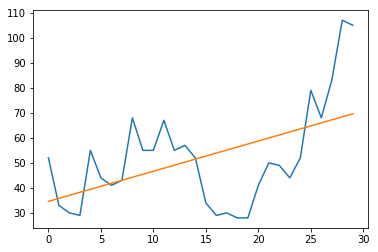

Коэффициент А0 и А1 линейной регрессии:  34.606 1.206


In [3]:
def linearRegr(values):
    y = values
    n = len(y)
    x = [i for i in range(n)]
    a1 = float(n * np.dot(x,np.transpose(y)) - sum(x) * sum(y))/(n*sum([i**2 for i in x]) - (sum(x))**2)
    a0 = float(sum(y) - a1*sum(x))/n
    y2 = [a0 + a1*i for i in x]
    ax1.plot(x,y2)
    print "График временного ряда и линейной модели(МНК):"
    return a0,a1
fig1,ax1 = plt.subplots()
ax1.plot([i for i in range(len(x))],x)
coeffs = linearRegr(x)
plt.show()
print "Коэффициент А0 и А1 линейной регрессии: ", '{0:.3f}'.format(coeffs[0]),'{0:.3f}'.format(coeffs[1])

График сглаженных значений для постоянной модели при alpha =  0.1 :


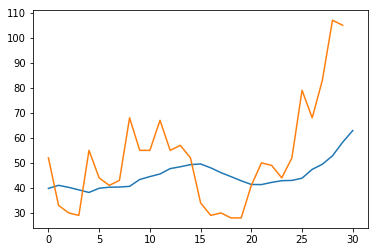

Ошибка предсказания для альфа =  0.1 :
[ 12.2   -8.02 -10.22 -10.2   16.82   4.14   0.73   2.65  27.39  11.65
  10.48  21.44   7.29   8.56   2.71 -15.56 -19.01 -16.11 -16.5  -14.85
  -0.36   8.67   6.81   1.13   9.01  35.11  20.6   33.54  54.19  46.77] 

Выборочная дисперсия для ошибки предсказания:  30.304 

График сглаженных значений для постоянной модели при alpha =  0.3 :


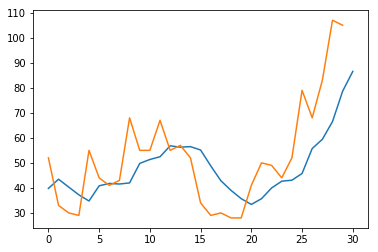

Ошибка предсказания для альфа =  0.3 :
[ 12.2  -10.46 -10.32  -8.23  20.24   3.17  -0.78   1.45  26.02   5.21
   3.65  14.55  -1.81   0.73  -4.49 -21.14 -19.8  -12.86 -11.    -7.7
   7.61  14.33   9.03   1.32   8.92  33.25  12.27  23.59  40.51  26.36] 

Выборочная дисперсия для ошибки предсказания:  148.760 



In [4]:
def constPrediction(x,alpha):
    p = np.array([])
    size = len(x)
    betta = 1 - alpha
    s0 = np.mean(x[:5])
    p= np.append(p,s0)
    for i in range(size):
        s = alpha * x[i] + (betta) * p[-1]
        p= np.append(p,s)
    print "График сглаженных значений для постоянной модели при alpha = ",alpha,":"
    fig,ax = plt.subplots()
    ax.plot([i for i in range(size+1)],p)
    ax.plot([i for i in range(size)],x)
    plt.show()
    print "Ошибка предсказания для альфа = ",alpha, ":\n", np.array([a - b for (a,b) in zip(x,p)]),"\n"  
    print "Выборочная дисперсия для ошибки предсказания: ", '{0:.3f}'.format(np.var(p)),"\n"
constPrediction(x,0.1)
constPrediction(x,0.3)

График при однократном сглаживании сглаженных значений линейной модели при alpha =  0.1 :


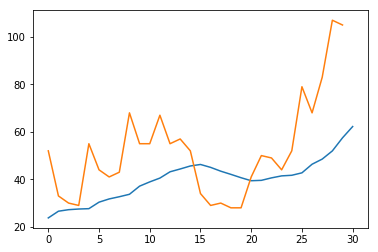

График при двойном сглаживании сглаженных значений линейной модели при alpha =  0.1 :


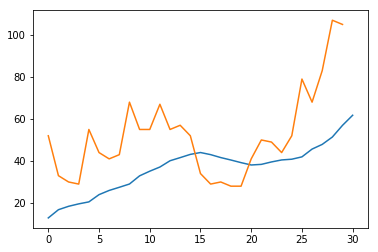

График при однократном сглаживании сглаженных значений линейной модели при alpha =  0.3 :


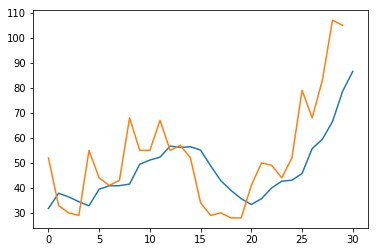

График при двойном сглаживании сглаженных значений линейной модели при alpha =  0.3 :


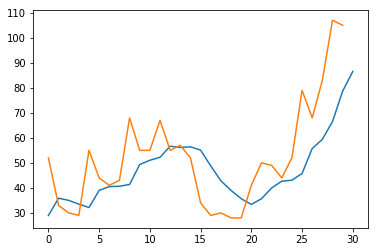

In [5]:
def linearPrediction(a0,a1,alpha):
    p1= np.array([])
    size = len(x)
    betta = 1 - alpha
    s0 = a0 - (betta/alpha)* a1
    p1= np.append(p1,s0)
    for i in range(size):
        s = alpha * x[i] + (betta)*p1[-1]
        p1= np.append(p1,s)
    p2 = np.array([])
    s0 = a0 - (2*betta/alpha)*a1
    p2 = np.append(p2,s0)
    for i in range(size):
        s = alpha*x[i] + betta * p2[-1]
        p2 = np.append(p2,s)
    print "График при однократном сглаживании сглаженных значений линейной модели при alpha = ",alpha,":"
    fig1,ax1 = plt.subplots()
    ax1.plot([i for i in range(size + 1)],p1)
    ax1.plot([i for i in range(len(x))],x)
    plt.show()
    print "График при двойном сглаживании сглаженных значений линейной модели при alpha = ",alpha,":"       
    fig2,ax2 = plt.subplots()
    ax2.plot([i for i in range(size + 1)],p2)
    ax2.plot([i for i in range(len(x))],x)
    plt.show()
linearPrediction(coeffs[0],coeffs[1],0.1)
linearPrediction(coeffs[0],coeffs[1],0.3)

Предсказанные значение Xt для alpha =  0.1 и m =  1 :

Xt[ 31 ] =  83.045
Ошибки предсказания на каждом шаге:
[ -6.73  -9.09  -9.49  12.23  -0.14  -3.71  -2.57  17.21   2.49   1.13
   9.87  -2.5   -1.2   -5.87 -20.42 -21.93 -18.51 -18.37 -16.82  -5.07
   1.25  -1.74  -7.46  -1.56  18.86   4.7   14.49  30.1   21.96] 

Выборочная дисперсия ошибки предсказания:  163.565 

График прогнозирования при alpha =  0.1 и m =  1 :


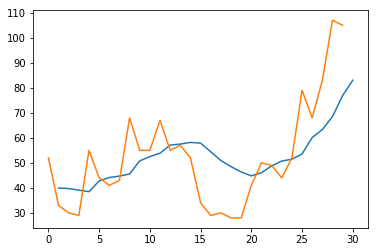

Предсказанные значение Xt для alpha =  0.1 и m =  5 :

Xt[ 31 ] =  60.138
Xt[ 32 ] =  63.297
Xt[ 33 ] =  68.508
Xt[ 34 ] =  76.905
Xt[ 35 ] =  83.045
Ошибки предсказания на каждом шаге:
[ -0.14  -3.71  -2.57  17.21   2.49   1.13   9.87  -2.5   -1.2   -5.87
 -20.42 -21.93 -18.51 -18.37 -16.82  -5.07   1.25  -1.74  -7.46  -1.56
  18.86   4.7   14.49  30.1   21.96] 

Выборочная дисперсия ошибки предсказания:  175.473 

График прогнозирования при alpha =  0.1 и m =  5 :


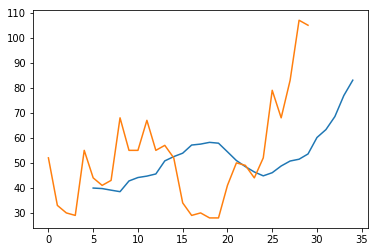

Предсказанные значение Xt для alpha =  0.3 и m =  1 :

Xt[ 31 ] =  70.871
Ошибки предсказания на каждом шаге:
[-6.02 -5.96 -5.57  9.69 -1.08 -2.81 -1.28 12.88  1.18  1.93  9.43  1.11
  4.17  2.17 -6.6  -5.58 -2.55 -2.94 -2.42  5.16  8.19  5.42  2.14  7.81
 23.03 12.96 23.28 37.   34.13] 

Выборочная дисперсия ошибки предсказания:  126.843 

График прогнозирования при alpha =  0.3 и m =  1 :


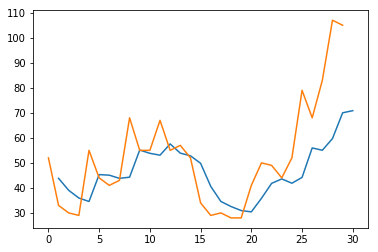

Предсказанные значение Xt для alpha =  0.3 и m =  5 :

Xt[ 31 ] =  55.966
Xt[ 32 ] =  55.043
Xt[ 33 ] =  59.725
Xt[ 34 ] =  70.004
Xt[ 35 ] =  70.871
Ошибки предсказания на каждом шаге:
[-1.08 -2.81 -1.28 12.88  1.18  1.93  9.43  1.11  4.17  2.17 -6.6  -5.58
 -2.55 -2.94 -2.42  5.16  8.19  5.42  2.14  7.81 23.03 12.96 23.28 37.
 34.13] 

Выборочная дисперсия ошибки предсказания:  129.608 

График прогнозирования при alpha =  0.3 и m =  5 :


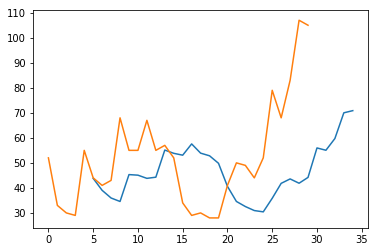

In [15]:
def prediction(a0,a1,alpha,m):
    size = len(x)
    betta = 1 - alpha
    a01 = np.array([])
    a11 = np.array([])
    a01 = np.append(a01,x[0] + betta**2*(a1 + a0 - x[0]))
    a11 = np.append(a11,a1 + alpha**2*(a1+a0-x[0]))
    for i in range(1,size):
        sums = a01[-1] + a11[-1] - x[i]
        a01 = np.append(a01,x[i] + betta**2*sums) 
        a11 = np.append(a11,a11[-1] + alpha**2*sums)
    xt = np.array([])
    for i in range(size):
        xt = np.append(xt,a01[i] + a11[i])
    error = np.array([])
    for i in range(m,size):
        error = np.append(error,x[i] - xt[i])
    print "Предсказанные значение Xt для alpha = ",alpha,"и m = ",m,":\n"
    for i in range(1,m+1):
        print "Xt[",size + i,"] = ", '{0:.3f}'.format(xt[-(m+1-i)])
    print "Ошибки предсказания на каждом шаге:\n", error,"\n"
    print "Выборочная дисперсия ошибки предсказания: ", '{0:.3f}'.format(np.var(error)),"\n"
    print "График прогнозирования при alpha = ", alpha, "и m = ",m,":"
    fig,ax = plt.subplots()
    ax.plot([i + m for i in range(size)],xt)
    ax.plot([i for i in range(size)],x)
    plt.show()
prediction(coeffs[0],coeffs[1],0.1,1)
prediction(coeffs[0],coeffs[1],0.1,5)
prediction(coeffs[0],coeffs[1],0.3,1)
prediction(coeffs[0],coeffs[1],0.3,5)

In [16]:
def getPolynominalDegree():
    r = x
    size = len(x)
    means = np.array([])
    for j in range(size - 1):
        r = [r[i] - r[i-1] for i in range(1,size - j)]
        means = np.append(means,abs(np.mean(r)))
#     print means
#     print np.amin(means)
    return np.argmin(means) - 1
print "Рекомендуемый порядок полинома: ",getPolynominalDegree()

Рекомендуемый порядок полинома:  7
